In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch,FontManager,add_image
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
from urllib.request import urlopen
from io import StringIO
from highlight_text import ax_text

In [2]:
##Loading the dataset(from https://github.com/clxrse/match_data)
df = pd.read_csv(r'https://raw.githubusercontent.com/clxrse/match_data/main/Futbol%20Club%20Barcelona/20-21-last%205-6/combineddata.csv')
#Filtering specific player's data using wyscout definition
playerName = input("Enter player Name(please use accented characters where needed):")
typew = "{'value': 1, 'displayName': 'Successful'}"
df = df.loc[(df.playerName==playerName) & (df.outcomeType == typew),
                 ['x', 'y', 'endX', 'endY']]
import numpy as np
df['x'] = df['x']*1.05
df['endX'] =df['endX']*1.05
df['y']=df['y']*0.68
df['endY']=df['endY']*0.68
df['dist1']=np.sqrt((105-df.x)**2 + (34-df.y)**2)
df['dist2']=np.sqrt((105-df.endX)**2 + (34-df.endY)**2)
df['distdiff'] = df['dist1']-df['dist2']
passA = df.query("(x<52.5)&(endX<52.5)&(distdiff>=30)")
passB = df.query("(x<52.5)&(endX>52.5)&(distdiff>=15)")
passC = df.query("(x>52.5)&(endX>52.5)&(distdiff>=10)")
passA = passA.append(passB)
passA = passA.append(passC)

Enter player Name(please use accented characters where needed):Lionel Messi


In [3]:
#check the number of progressive passes
len(passA.index)

39

In [4]:
#Loading Some Fonts
URL = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Bold.ttf?raw=true'
URL2 = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Light.ttf?raw=true'
font_regular = FontManager(URL2)
font_bold = FontManager(URL)

In [5]:
#Loading the club logo & Arrow
logourl = "https://upload.wikimedia.org/wikipedia/en/thumb/4/47/FC_Barcelona_%28crest%29.svg/1200px-FC_Barcelona_%28crest%29.svg.png"
LOGO_URL = logourl
logo = Image.open(urlopen(LOGO_URL))

arrowurl = "https://raw.githubusercontent.com/clxrse/open_mod/main/straightarrow.png"
arrow_url = arrowurl
arrow = Image.open(urlopen(arrow_url))

In [6]:
#Make a custom cmap (use a color of your choice here I have chosen #cccdcf as pitch color and #477acc as cmap color)
pitch_color = input("Enter a color(hex):")
cmap_color = input("enter cmap color(hex):")
cmap = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color], N=100)

Enter a color(hex):#cccdcf
enter cmap color(hex):#477acc


In [7]:
#set up the pitch
pitch = VerticalPitch(pitch_type ='uefa',line_zorder=2,line_color='#000000',pitch_color=pitch_color)

In [8]:
your_twitter_username = input("Enter your username/name:")

Enter your username/name:@keratinised


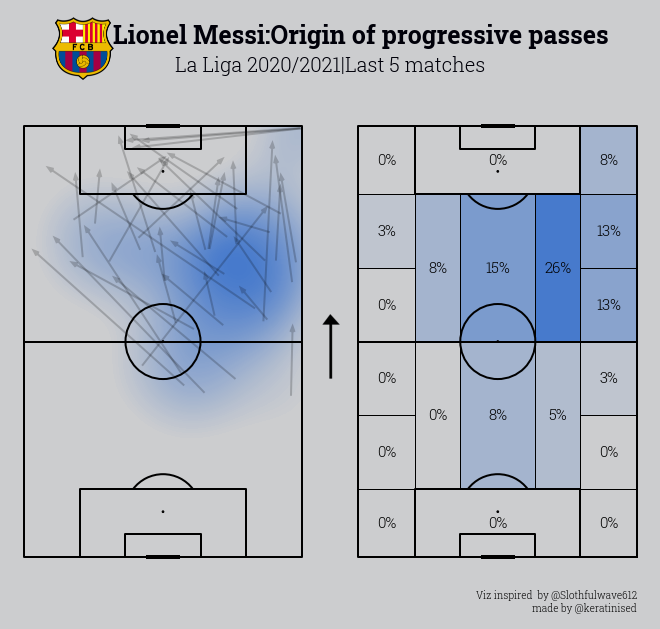

In [9]:
fig, axs = pitch.grid(ncols =2,axis=False)
fig.set_facecolor(pitch_color)
hm = pitch.kdeplot(passA.x,passA.y,cmap=cmap,shade=True,levels=100,ax=axs['pitch'][0])

bin_statistic = pitch.bin_statistic_positional(passA.x, passA.y, statistic='count',
                                               positional='full', normalize=True)

pitch.heatmap_positional(bin_statistic, ax=axs['pitch'][1],
                         cmap=cmap, edgecolors='#000000')

labels = pitch.label_heatmap(bin_statistic, color='black', fontsize=15,
                             ax=axs['pitch'][1], ha='center', va='center',
                             str_format='{:.0%}',fontproperties=font_regular.prop)


from mplsoccer.quiver import arrows
lines = pitch.arrows(xstart=passA.x,ystart=passA.y,xend=passA.endX,yend=passA.endY,alpha=0.2,color='#000000',width=2,headlength=4,zorder=1,ax=axs['pitch'][0])




#add text 
CREDIT_1 = "Viz inspired  by @Slothfulwave612"
CREDIT_2 = f'made by {your_twitter_username}'
axs['endnote'].text(1, 0.5, f"{CREDIT_1}\n{CREDIT_2}", va='center', ha='right', fontsize=10,fontproperties=font_regular.prop,color='black')

axs['title'].text(0.55, 0.7,  f'{playerName}:Origin of progressive passes', color='#000009',va='center', ha='center', fontproperties=font_bold.prop, fontsize=25)


axs['title'].text(0.5, 0.4, "La Liga 2020/2021|Last 5 matches", color='#000009',va='center', ha='center', fontproperties=font_regular.prop, fontsize=20)


ax_logo = add_image(logo, fig,left=0.09,bottom=0.86,height=0.1)

ax_arrow = add_image(arrow, fig,left=0.488,bottom=0.4,height=0.1)

plt.savefig(f'{playerName} progrpass.png',dpi=500)